## BUSINESS CASE: BASED ON THE FEATURES OF DATA WE NEED TO CLUSTER (GROUP) THE PLAYER BASE ON THEIR SKILLSET

## IMPORTING BASIC LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### LOAD DATA

In [2]:
data=pd.read_csv("players_20.csv")
pd.set_option("display.max_columns", None)
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

## DOMAIN ANALYSIS

**1.SOFIFA_ID:**
- It is a Unique Feature.Unique ID assigned to each football player on Sofifa.

**2. PLAYER_URL:**
- Player_url represents the URL or web link to the player's profile on Sofifa's website.

**3. SHORT_NAME:**
- It is player's short or commonly used name.

**4. LONG_NAME:**
-  Long_name represents player's formal identification. player's full or complete name. It includes the player's first name and last name.

**5. AGE:**
- Age Represents the player's age, typically measured in years.

**6. DOB (DATE OF BIRTH):**
- This Feature represents the date of birth of the football player. It indicates the player's birthdate, providing information about their age.

**7. HEIGHT_CM (HEIGHT IN CENTIMETERS):**
- This feature represents the player's height in centimeters.

**8. WEIGHT_KG (WEIGHT IN KILOGRAMS):**
- This Feature indicates the player's weight in kilograms. weight is a also physical attribute that can motivats a player's performance and role on the field.

**9. NATIONALITY (NATIONALITY OF THE PLAYER):**
- This Feature Represents the nationality or country of  the football player.

**10. CLUB (FOOTBALL CLUB):**
- This feature represent the name of the football club to which the player belongs.

**11. OVERALL:**
- The "overall" feature represents the player's overall skill rating.

**12. POTENTIAL:**
- The potential feature represent a player's potential skill rating. It represents the estimated maximum skill level a player can achieve in the future, considering factors like age, development, and performance.

**13. VALUE (IN EUROS):**
- The value_eur Feature represents the market value of the player in Euros.

**14. WAGE (IN EUROS):**
- The wage_eur Feature represents the player's weekly wage in Euros. It represents the salary that the player earns from their club on a weekly basis.

**15. PLAYER POSITIONS:**
- The player_positions Feature represents the positions on the football field where the player is capable of playing.

**16. PREFERRED FOOT:**
- This Feature reprsents whether a football player prefers to kick the ball with their left foot or right foot.

**17. INTERNATIONAL REPUTATION:**
- This attribute measures a player's reputation on the international stage.

**18. WEAK FOOT:**
- A weak foot just means that your gameplay is better when you use one foot instead of the other.As a football player can be either right-footed or left-footed.Ratings range from 1 to 5, with 1 indicating a very weak weaker foot and 5 indicating a very strong weaker foot.

**19. SKILL MOVES:**
-  Skill Moves feature represent the actions like controlling the ball with a first touch, developing into more complex actions like scoring an overhead kick from a cross.Ratings range from 1 to 5, with 1 representing limited skill moves and 5 indicating a high level of skillfulness.

**20. WORK RATE:**
- a player's work rate in football refers to how hard they work and how much they move around during a game. It's about how actively they participate in the match.

**21. BODY_TYPE:**
- This column represents the player's body type.

**22. REAL_FACE:**
- This Feature indicates whether the player has a real face in the game.

**23. RELEASE_CLAUSE_EUR:**
- This column indicates the release clause value in Euros for the player.A release clause is a set fee agreed upon when a player signs a contract with a club, allowing another club to sign that player if the fee is met.

**24. PLAYER_TAGS:**
- These Player tags can provide information about specific characteristics or qualities of the player. For example, a player might have tags like "Speedster," "Clinical Finisher," "Playmaker," or "Physical Presence."

**25. TEAM_POSITION:**
- This Feature represents the player's position within their team's formation or lineup.

**26. TEAM_JERSEY_NUMBER:**
- This column represents the jersey number worn by the player within their current team.

**27.LOANED_FROM:**
- If a player is currently on loan from another club, this column indicates the name of the club from which the player is loaned.

**28. JOINED:**
- This column represents the date when the player officially joined their current club.

**29. CONTACT VALID UNTIL:**
- This Feature indicates the end year of the player's contract with their current club.

**30. NATION POSITION:**
- Nation Position is a term that Represent the role or position a football player plays when representing their home country's national team.

**31. NATION JERSEY NUMBER:**
- This Feature represents the jersey number worn by the player when representing their national team.

**32. PACE:**
- The Pace Feature is related to a player's speed and acceleration on the football field.

**33. SHOOTING:**
- Shooting represent trying to kick or head the football into the goal to score a point. It's like trying to throw a ball using your feet or head in football.

**34. PASSING:**
- Passing is like sharing the ball with teammates. It's when a player kicks the ball to another player on the same team to help move the ball forward on the field.

**35. DRIBBLING:**
- Dribbling is like keeping the ball close to feet while you run with it.In football, it's about using your feet to keep control of the ball while you run and dodge opponents.

**36. DEFENDING:**
- Defending is all about stopping the other team from scoring.

**37. PHYSIC:**
- In football and games like FIFA 20, PHYSIC tells us how strong and hardworking a player is on the field.

**38. GK DIVING:**
- GK Diving is a skill that goalkeepers use in football. It's like a goalkeeper's superpower for jumping and diving quickly to stop the ball from going into the goal.

**39. GK HANDLING:**
- GK Handling is represent how good a goalkeeper is at safely catching the ball when it's kicked toward them.

**40. GK KICKING:**
- GK Kicking  is a skill that goalkeepers have to kick the ball to different places on the field.

**41. GK REFLEX:**
- GK Reflex is represent all about a goalkeeper's ability to react lightning-fast to unexpected situations and make amazing saves.

**42. GK SPEED:**
- GK Speed is represent all about how fast the goalkeeper can move around the goal area.

**43. GK POSITIONING:**
- GK Positioning is represent about them being in the right place at the right time to block shots.

**44. PLAYER TRAITS:**
- Player Traits are like a player's special habits. These are actions they're more likely to do in matches.

**45. ATTACKING CROSSING:**
- It's like a player trying to kick the ball from the sides of the field towards the middle, where their teammates are waiting to score a goal.

**46. ATTACKING FINISHING:**
- Attacking Finishing is about creating a plan to score a goal.

**47. ATTACKING HEADING ACCURACY:**
- Attacking Heading Accuracy is indicate a player using their head to hit the football and score a goal.

**48. ATTACKING SHORT PASSING:**
- Attacking Short Passing is like a player's ability to pass the football quickly and accurately over a short distance to their teammates.

**49. ATTACKING VOLLYES:**
- Attacking Vollyes as kicking the football while it's up in the air, without letting it touch the ground first.

**50. SKILL DRIBBLING:**
- Skill Dribbling is all about a player's ability to show off fancy and tricky moves while they're running with the ball.

**51. SKILL CURVE:**
- When a player tries to kick the ball in a way that makes it curve or bend, that's called Skill Curve.

**52. SKILL FK ACCURACY:**
- Skill FK Accuracy is player kicking the ball from a set distance, like aiming to score a goal directly from a free kick.

**53. SKILL LONG PASSING:**
- Kill Long Passing is about how well a player can pass the ball over long distances.

**54. SKILL BALL CONTROL:**
- Skill Ball Control is how skilled a player is at handling the ball with their feet during the game.

**55. MOVEMENT ACCELARATION:**
- Movement Accelaration measures how fast a player can speed up when they're trying to reach their maximum running speed.

**56. MOVEMENT SPRINT SPEED:**
- Movement Sprint Speed is all about how fast a player can run at their top speed.

**57. MOVEMENT AGILITY:**
- Movement Agility is about how  player ability to dash in different directions without tripping or losing their balance.

**58. MOVEMENT REACTION:**
- Movement Reaction is represent how fast a player can react to things happening on the field. It's like measuring how quickly they can respond to what's going on during the game.

**59. MOVEMENT BALANCE:**
- Movement Balance represent how well they can keep themselves steady and not fall over when they're running and moving.

**60. SHOT POWER:**
- Shot Power is about measuring how hard they can kick the ball to make it go fast and strong toward the goal.

**61. POWER JUMPING:**
- Power Jumping  assessing their ability to leap into the air, which can be useful for heading the ball or reaching high places.

**62. POWER STAMINA:**
- Power Stamina measuring how much energy they have to keep running and playing effectively.

**63. POWER STRENGTH:**
- Power Strength is about how strong they are and how well they can use their strength in different situations during the game.

**64. POWER LONG SHOT:**
- Power Long Shot is the how good they are at making strong and accurate shots from far away.

**65. MENTALITY AGGRESSION:**
- Mentality Aggression relates to how determined and assertive they are in their play, which can impact their performance.

**66. MENTALITY INTERCEPTION:**
- Mentality Interception is about trying to steal the ball or take possession away from the other team.

**67. MENTALITY POSITIONING:**
- Mentality Positioningis like deciding how your players should play in terms of defense or attack.

**68. MENTALITY VISION:**
- Mentality Vision refers to a player's mental perspective and awareness of what's happening during the match.

**69. MENTALITY PENALTIES:**
- Mentality Penalties In football, when a player breaks the rules (commits an infraction), the referee may call a foul and assess a penalty against the player or their team.

**70. MENTALITY COMPOSURE:**
- Mentality Composure is about a player's ability to handle pressure and stay focused, especially after making a mistake.

**71. MENTALITY COMPOSURE:**
- Mentality Composure is like a mental process in sports. It involves recognizing that you've made a mistake, then regrouping your thoughts, and refocusing on the game.

**72. DEFENDING MAKING:**
- Defending Making is like a strategy to make the field smaller and limit the options of the opposing team.

**73. DEFENDING STANDING TACKLE:**
- Defending Standing Tackle is when a player uses their feet to make a tackle and take the ball away from the opponent while staying on their feet.

**74. DEFENDING SLIDING TACKLE:**
- Defending Sliding Tackle is when a player slides on the ground to tackle and take the ball away from the opponent.

**75. GOALKEEPER HANDLING:**
- Goalkeeper Handling represent a goalkeeper, handle the ball with hands but only within penalty area. Goalkeeper Handling refers to how skillfully a goalkeeper can catch or grip the ball safely when it comes toward them.

**76. GOALKEEPER KICKING:**
- Goalkeepers often kick the ball to restart play or distribute it to teammates. "GOALKEEPING KICKING" assesses the accuracy and power of a goalkeeper's kicks.

**77. GOALKEEPER POSITIONAING:**
- Goalkeeper Positionaing refers to where a goalkeeper positions themselves in the goal area to make it harder for the opposing team to score.

**78. GOALKEEPER REFLEX:**
- Goalkeeper Reflex is about a goalkeeper's ability to react quickly to unexpected situations, like fast shots or deflections.

#### THE REMAINING FEATURE IS THE ABBREVATION OF FOOTBALL POSITION SCORE:
**LS:**
Long snapper or left striker.

**ST:**
Striker

**RS:**
Right striker

**LW:**
Left sided wingers.

**LF:**
Left forword

**CF:**
Center forword

**RF:**
Right forword

**RW:**
The RW is usually on the right end of the attacking trident, with the Striker and Left Winger, which mainly contributes to the team in terms of goals and assists.

**LAM:**
Left attacking midfield

**CAM:**
Center attacking midfield

**RAM:**
Right attacking midfield

**LM:**
Left midfield

**LCM:**
Left center midfield

**CM:**
Center Midfield

**RCM:**
Right center midfield

**RM:**
Right midfield

**LWB:**
Left Wing Back

**LDM:**
Left defensive midfield

**CDM:**
Center defensive midfield

**RDM:**
Right defensive midfield

**RWB:**
Right wing back

**LB:**
Left back

**LCB:**
Left center back

**CB:**
Center back

**RCB:**
Right center back

**RB:**
Right back

### BASIC CHECKS

In [3]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [4]:
data.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,2019-02-01,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,SUB,38.0,NaN,2019-01-01,2019.0,NaN,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,SUB,33.0,NaN,2019-02-01,2022.0,NaN,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,SUB,37.0,Tianjin TEDA FC,NaN,2019.0,NaN,NaN,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,34,35,52,46,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [5]:
data.shape

(18278, 104)

In [6]:
columns = list(data.columns)
print(columns)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [7]:
data.dtypes

sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [9]:
# Replace special character
data.replace('[!@#\?]','',regex=True,inplace=True)

In [10]:
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
           'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
data[columns]

for colmun in columns:
    data[colmun] = data[colmun].str.split('+',expand=True)[0]
data.head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"Dribbler, Distance Shooter, Crosser, FK Specia...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63


### NUMERICAL FEATURES

In [11]:
num_data=data.select_dtypes(include=["int64","float64"])
num_data.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

### CATEGORICAL FEATURES

In [12]:
cat_data=data.select_dtypes(include='O')
cat_data.columns

Index(['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
       'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

### STATISTICAL MEASURES OF NUMERICAL DATA

In [13]:
data.describe(include=["int64","float64"])

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

### Observation/Insights

- The dataset contains information about total number of football players is  18,278.
- The average age of players is around 25 years, with a minimum age of 16 and a maximum age of 42.
- The average height is approximately 181 cm, with a range from 156 cm to 205 cm.
- The average weight is about 75 kg, ranging from 50 kg to 110 kg.
- The players' overall ratings have an average of about 66, with a potential rating averaging around 71.
- The highest-rated player has an overall rating of 94, indicating an exceptional talent.
- The lowest overall rating is 48, which suggests lower-tier players.
- The average player value is 2.5 million euros, with a wide range of values, including some players valued as high as 105.5 million euros.
- Player wages vary, with an average wage of around 9,457 euros per week.
- Skill moves and weak foot ratings are mostly concentrated around 3, indicating that many players have moderate skills in this regard.
- Release clauses have a wide range, with an average of around 4.7 million euros.
- Most player contracts are valid until the year 2021, but there is variability, with some extending beyond that year.

### STATISTICAL MEASURES OF CATEGORICAL DATA

In [14]:
data.describe(include='O')

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,player_tags,team_position,loaned_from,joined,nation_position,player_traits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,1499,18038,1048,16990,1126,7566,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,2,83,29,316,1760,26,921,60,60,60,66,65,65,65,66,65,65,65,62,56,56,56,62,56,59,59,59,56,55,62,62,62,55
top,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,1992-02-29,England,FC Barcelona,CB,Right,Medium/Medium,Normal,No,Strength,SUB,Sassuolo,2019-07-01,SUB,Early Crosser,61,61,61,63,63,63,63,63,61,61,61,61,58,58,58,61,59,59,59,59,59,61,63,63,63,61
freq,1,11,3,113,1667,33,2322,13960,9875,10750,16310,514,7820,17,1465,587,501,731,731,731,740,733,733,733,740,756,756,756,817,777,777,777,817,692,643,643,643,692,673,624,624,624,673


## EXPLORATORY DATA ANALYSIS

### 1. UNIVARIATE DATA ANALYSIS

In [15]:
univariate = data[[ 'age',  'height_cm', 'weight_kg','overall', 'potential', 'value_eur', 'wage_eur',
                   'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type',
                   'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number',
                   'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing',
                   'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
                   'gk_positioning','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                   'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
                   'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
                   'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
                   'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
                   'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking',
                   'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
                   'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs', 'lw', 'lf',
                   'cf', 'rf', 'rw', 'lam','cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
                   'lb', 'lcb', 'cb', 'rcb', 'rb']]
import sweetviz as sv
my_report=sv.analyze(univariate)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Observation/Insights

**1. AGE:**
- The highest Age of the player is 42.The lowest Age of the Player is 16.
- The Average Age of the player is 25.3.
- The data is positively skewed, indicating that it is skewed to the right.

**2. HEIGHT:**
-  The Maximum Height of the player is 205Cm.The Minimum Height of the player is 156cm.
- The Average Height of the player is 181.4Cm.
- The data is slightly negatively skewed, indicating a minor left skew.

**3. WEIGHT:**
- The maximum Weight of the player is 110Kg.The minimum Weight of the player is 50Kg. The average Weight of the player is 75.3Kg
- The average and median are relatively close symmetrically distributed around the mean.

**4. OVERALL:**
- The Maximum Overall skill rating of player is 94.The Minimum overall skill rating of the player is 48.The average overall skill rating 66.2.
- data has slightly heavier tails compared to a normal distribution but is still close to normal.

**5. POTENTIAL:**
- The Maximum Potential skill rating is 95. The Minimum potential skill rating is 49.The average potential skill rating is 71.5.
- data has tails lighter than a normal distribution, data is slightly skewed to the right.

**6. VALUE_EUR:**
- The Maximum Market value of the player is 105.5 million. The minimum Market value of the player is 0 million.The Average Market value of the player is 2.5 million.
- data has extremely heavy tails compared to a normal distribution.

**7. WAGE_EUR:**
- The Maximum Weekly salary of the player is 565k.The minimum weekly salary of the player is 0k.The Average weekly salaey of the player is 9k.
- data is heavily right-skewed, with a long tail on the right side.

**8. PREFERRED_FOOT:**
- The majority of football player prefer to use their right foot is 13,960. There are significantly fewer football player 4,318 prefer to use their This suggests that the majority of individuals in the dataset have a relatively lower international reputation.left foot.
- There is a clear seen that imbalance in the dataset regarding preferred foot. The number of Players preferring their right foot is much larger than those preferring their left foot.

**9. INTERNATIONAL_REPUTATION:**
- The most common international reputation level is 1 with 16,794 players.This suggests that the majority of players in the dataset have a relatively lower international reputation.
- 292 players with a International reputation level of 3 is quitely higher than level 4 or level 5 players with international reputation.

**10. WEAK_FOOT:**
- The most common weak foot level  is 3, with 11,347 Players.This suggests that a players have a moderate or average weak foot.
- 3,865 Player have a weak foot level of 2. and 2,666 Player have a weak foot level of 4. is quitly higher than level 5 and 1.

**11. SKILL_MOVES:**
- The majority of Players have a skill move level of 2 or 3, with 8,617 or 6,536 Players.This suggests that a players have a moderate skill level.
- 2,036 players have the lowest skill move level, which is level 1.

**12. WORK_RATE:**
- The Majority work rate category is Medium with 9,875 Players.while some work rate categories like Low are less frequent.

**13. BODY_TYPE:**
- The Majority body type category is Normal and Lean with 10,750 and 6505 number of players having this body type.

**14. REAL_FACE:**
- The majority 16,310 No of players categorized as having No real face, A Minimum number of players 1,968 are categorized as having a Yes real face.

**15. RELEASE_CLAUSE_EUR:**
-  The Maximum number of players is 195.8 million release clause.and the average number of players is 4.7 million relese clause.
- data is heavily right-skewed, with a long tail on the right side.

**16. PLAYERS_TAGS:**
- Strength is the Maximum player tag, appearing 514 times.Acrobat and Engine are also have maximum number of players tag appering 238 and 209 times.

**17. TEAM_POSITION:**
- The maximum number of  team position is SUB with 7,820 playes occupying this role.
- Positions like RES(Reserve), and GK(Goalkeeper)  with 2958 and 662 players have higher frequencies compared to others.

**18. TEAM_JERSEY_NUMBER:**
- The Highest jersey number is 99. The lowest jersey number is 1.And the average jersey number is 20.It suggesting that the data is positively skewed with a tail on the right side.

**19. CONTRACT_VALID_UNTIL:**
- The highest contract validity year is 2020, with 6,131 number of players having contracts expiring in that year.
- it appears that the years 2020, 2021, and 2022 have a significant number of contract expirations, which could be indicative of planning for player contracts in these years.

**20. NATION_POSITION:**
- The Highest nation position is SUB(Substitute), with 587 number of players being substitutes for their national teams.

**21. NATION_JERSEY_NUMBERS:**
- The data spans from a minimum value of 1.0 to a maximum value of 30.0, with a wide range of values. and the average nation jersey number is 12.

**22. PACE (Speed):**
- The speed of football players Some are as slow as 24, while others hand can go as fast as 96.
- The data is not evenly balanced, it's skewed in one direction. and the average speed is 67.7.

**23. SHOOTING (Scoring Ability):**
- Players' scoring abilities The lowest scoring ability rating is 15, while the highest scoring ability is 93.
- On average, players have a shooting rating of 52.3.
- The data is slightly skewed to the left.

**24. PASSING (Passing Accuracy):**
- Passing abilities ranging from a minimum passing accuracy of 24 to a maximum passing accuracy of 92.
- The average passing acc is 57.2.
- The distribution of passing ratings is not a perfect bell curve, indicating that it's not normally distributed.

**25. DRIBBLING (Ball Control):**
- Dribbling skills have range from a minimum of 23 to a maximum of 96.
- On average, players have a dribbling rating of 62.5.
- The distribution of dribbling ratings is not perfectly balanced.

**26. DEFENDING (Defensive Skills):**
- Defensive abilities ranging from a minimum Defensive skill rating of 15 to a maximum defensive skill rating of 90.
- The average defending rating is 51.6.

**27. PHYSIC (Physical Attributes):**
- Physical attributes of players, such as strength or athleticism, range from a minimum of 27 to a maximum of 90.
- An average of physical capabilities of players is 64.9.

**30. GK_DIVING:**
- The best goalkeepers have a diving ability rating of 90.The worst goalkeepers have a rating of 44.
- An average, the goalkeepers have a diving ability rating of 65.4.

**31. GK_HANDLING:**
- The best goalkeepers have a handling ability rating of 92.The lowest-rated goalkeepers have a handling ability of 42. An average, goalkeepers in the dataset have a handling ability rating of 63.1.

**32. GK_KICKING:**
-  The highest goalkeepers have a gk_kicking rating of 93.Some goalkeepers have a low gk_kicking rating of 35.an average goalkeepers have a gk_kicking rating of 61.8.

**33.GK_REFLEXES:**
- The highest goalkeepers have gk_reflexes rating  is 92.Some goalkeepers have a Minimum gk_reflexes rating is 45.an average goalkeepers have a gk_reflexes rating is 66.4.

**34. GK_SPPED:**
- some goalkeepers are quite fast their highest gk speed rating for this goalkeepers is 65. some goalkeepers are not very fast their lowest gk speed rating for this goalkeepers is 12.an average goalkeepers have a gk speed rating of 37.8.

**35 GK_POSITIONING:**
- goalkeepers have excellent highest gk_positioning skill rating is 91. goalkeepers with less effective and lowest gk_positioning rating is 41. An average gk_positioning rating is 63.4 The data is quite symmetrical.

**36. ATTACKING_CROSSING:**
- The highest attacking crossing rating is 93,The lowest attacking crossing rating is 5.An average players have a attacking crossing skill of 49.7.

**37. ATTACKING_FINISHING:**
- players are exceptionally good at attacking finishing rating is 95.players with very poor attacking finishing rating is 2.players have moderate abilities Average attacking finishing is 45.6.

**38. ATTACKING_HEADING_ACCURACY:**
-  players are exceptionally accuracy at attacking heading the ball the highest rating is 93.players with very poor accuracy at attacking heading the ball the lowest rating is 5. The average accuracy attacking heading is 52.2.

**39. ATTACKING_SHORT_PASSING:**
- Players with attacking short passing highest rating is 92. and the players with attacking short passing lowest rating is 7. and the attacking short passing avreage rating is 58.7

**40. ATTACKING_VOLLEYS:**
- Players with attacking volleying the ball highest rating is 90. and the lowest rating of attacking volleying the ball is 3. average rating of attacking volleying is 42.8.

**41. SKILL DRIBBLING:**
- Players with skill dribbling the highest rating is 97. and the lowest rating of skill dribbling is 4.0. and the average rating of skill dribbling is 55.6.

**42. SKILL_CURVE:**
- players have skill in curving the ball highest rating is 94. and the lowest skill curving rating is 6.0. and the average skill curve rating is 47.3.

**43. SKILL_FK_PASSING:**
- players have skill of free kick passing highest rating is 94. and the lowest rating of skill of free kick passing is 4.0. and the average rating is 42.7.

**44. SKILL_LONG_PASSING:**
- Plyers have long passing skill highest rating is 92.players with very poor long passing abilies rating is 8.0 and the average of long passing skill rating is 52.8

**45. SKILL_BALL_CONTROL:**
- Players having ball control skill highest rating is 96 and the players having very lowest ball control skill rating is 5.0. and the average ball control skill rating is 58.5.

**46. MOVEMENT_ACCELARATION:**
- Most players have Maximum movement acceleration ratings is 97,On the other hand, the lowest rating for movement acceleration is 12.And the average movement accelaration is 64.3.

**47. MOVEMENT_SPRINT_SPEED:**
- The highest Movemnt sprint speed among players is 96.The lowest movement sprint speed observed is 11.The averaOn average, players have a movement reaction rating of 61.8,ge movement sprint speed rating is 64.4.

**48. MOVEMENT_AGILITY:**
- The highest movement agility rating is 96.The lowest movement sprint speed observed is 11. The average sprint speed rating is 64.4.

**49. MOVEMENT_REACTIONS:**
- players react very quickly to changes highest movement reaction rating is 96.players react very Slowely to changes lowest movement reaction rating observed is 21.An average players have a movement reaction rating of 61.8.

**50. MOVEMENT_BALANCE:**
-  players have highest movement balance rating is 97.some players have lowest movement balance rating is 12.An average players have a movement balance rating of 63.9.

**51. POWER_SHOT_POWER:**
- players possess highest power shot power rating is 95.The lowest power shot power rating is 14.An average players have a shot power rating of 58.2.

**52. POWER_JUMPING:**
- The range of power strong and lower level jumping abilities ratings from 19 to 95.An average players have a power jumping rating of 64.9.

**53. POWER_STAMINA:**
- maximum power stamina rating observed is 97.player with very low stamina.minimum power stamina rating is 12.The average power stamina rating is 62.9.

**54. POWER STRENGTH:**
- strong players with highest strength rating is 97, weak players with lowest strength rating is 20,An average players have a strength rating of 65.2.

**55. POWER LONG SHOT:**
- players with excellent long-range shooting abilities rating is 94,players who are not skilled at long shots rating is 4.The average long shot rating is 46.8.

**56. MENTALITY AGGRESSION:**
- players play aggressively With highest aggression rating is 95.players are less aggressive with lowest aggression rating is 9.An average players have an aggression rating of 55.7.

**57. MENTALITY INTERCEPTION:**
- players with strong interception skills Highest interception rating is 93.players with poor interception abilities with lowest interception rating is 3. The average interception rating is 46.3.

**58. MENTALITY POSITIONING:**
- players with excellent positioning WITH highest positioning rating is 95. players who struggle with positioning With lowest positioning rating is 2 An average players have a positioning rating of 50.1

**59. MENTALITY VISION:**
- players with excellent awareness and vision With best vision rating is 94. players with limited field awareness lowest vision rating is 9. The average vision rating is 53.6.

**60. MENTALITY PANALTY:**
- players with good penalty-taking skills With highest penalty rating is 92.players may struggle with penalties with lowest penalty rating is 7.An average players have a penalty rating of 48.7.

**61. MENTALITY COMPOSURE:**
- players remain composed in crucial situations With highest composure rating is 96.players may get nervous under pressure lowest composure rating is 12.An average players have a composure rating of 58.5.

**62. DEFENDING MARKETING:**
- players with strong defensive marking skills with highest marking rating is 94.players with poor marking abilities with lowest marking rating is 1.The average marking rating is 46.8.

**63. DEFENDING STANDING TACKLE:**
- players with strong standing tackle abilities With highest standing tackle rating is 92. players with weaker tackling skills lowest standing tackle rating is 5.The average standing tackle rating is 47.6.

**64. DEFENDING SLIDING TACKLE:**
- players with excellent sliding tackle skills With highest sliding tackle rating observed is 90. players have very limited ability with lowest sliding tackle rating is 3. The average sliding tackle rating is 45.6.

**65. GOALKEEPING_DIVING:**
- goalkeepers with strong diving abilities With highest diving rating observed is 90.some goalkeepers have extremely lowest diving skills lowest diving rating is 1.The average goalkeeping diving rating is 16.6.

**66. GOALKEEPING_HANDLING,GOALKEEPING_KICKING,GOALKEEPING_POSITIONING,GOALKEEPING_REFLEXES:**
- Highest and lowest rating of this goalkeeper abilities skill in a same range 1 to 91,92,93.
- The average ratings for these attributes are quite similar ranging from 16.2 to 16.7.

**67.PLAYER POSITIONS:**
- [LS, ST, RS, LW, LF, CF, LF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB]
- This all position scores are almost same as well as most of the observation range between 56 to 63

### 2. BIVARIATE DATA ANALYSIS

#### NUMERICAL VERIABLE

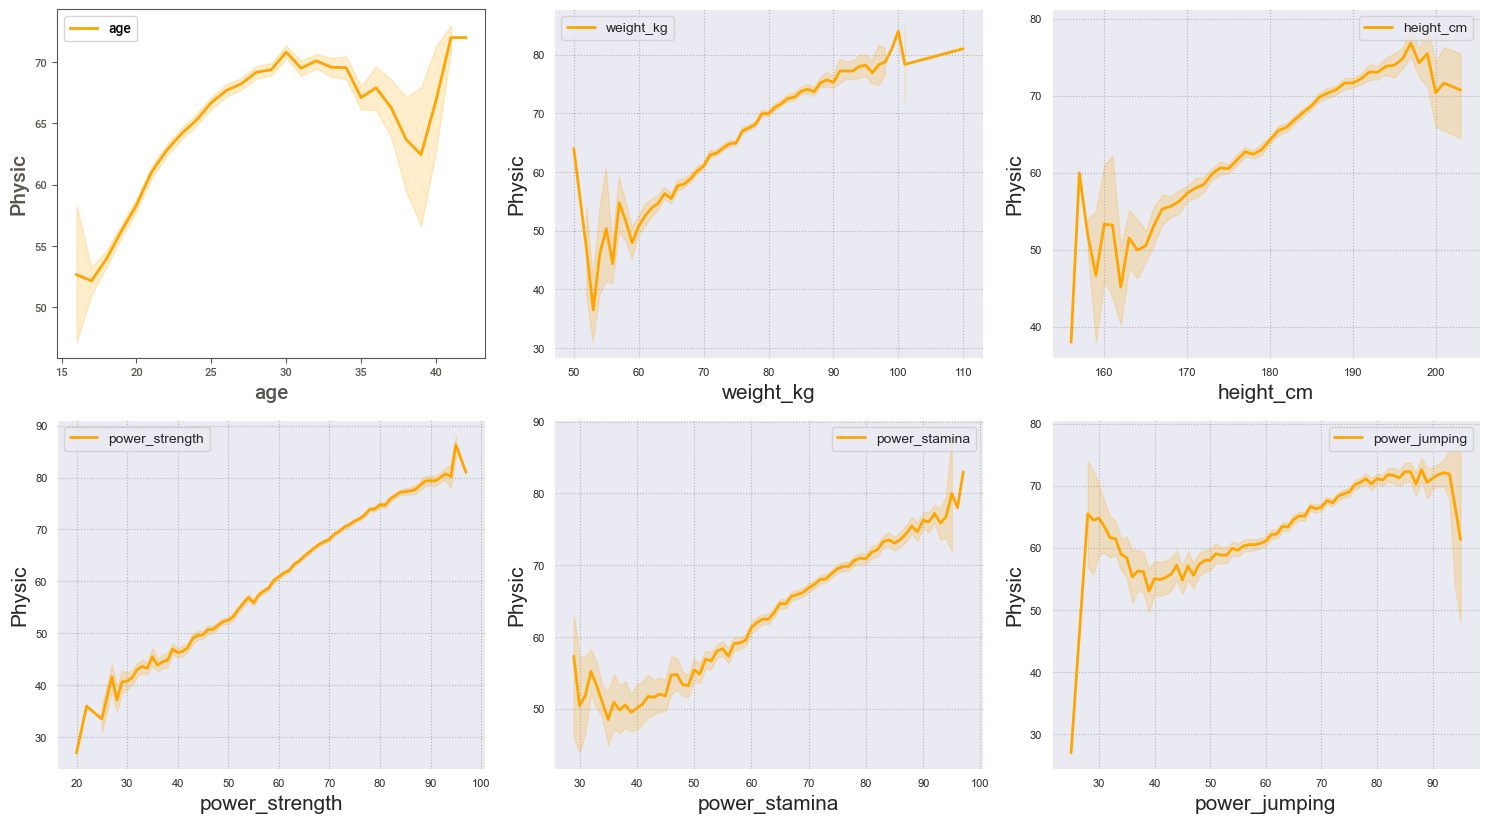

In [16]:
columns_to_plot = ["age", "weight_kg", "height_cm","power_strength","power_stamina","power_jumping"]
plt.figure(figsize=(15,12))
plotnumber=1

for column in columns_to_plot:
    if plotnumber<8:
        plt.subplot(3,3,plotnumber)
        sns.lineplot(x=data[column], y=data["physic"], label=column,color="orange",linewidth = 2)
        sns.set_style("darkgrid", {"grid.color": ".7", "grid.linestyle": ":"})
        plt.xlabel(column, fontsize=15)
        plt.ylabel("Physic", fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.legend()
plt.show()

### OBSERVATION/INSIGHTS

#### 1.Relationship between Age and Physic:
- The analysis reveals that players at these specific aged around 25, 30, and 40 tend to have exhibit better and higher physics such as strength, speed ratings.

#### 2.Relationship between Weight and Physic:
- players within this weight range of approximately 3.6 to 4.0  tend to be have more higher physics ratings and robust.

#### 3.Relationship between Height and Physic:
- Players whose height falls within the range of 185 to 195 centimeters tend to have higher physics ratings.

#### 4.Relationship between power_strength and Physic:
- players having maximum power_strength there tends corresponding increase in the physic rating of players.
- Its show postive relationship between power_strangth and physic.
- power_strength range from 70 to 100 as these power strength value are high, their physic are also high.

#### 5.Relationship between power_stamina and Physic:
- players having maximum power_stamina there tends corresponding increase in the physic rating of players.
- Its show postive relationship between power_stamina and physic.
- power_stamina range from 70 to 100 as these power_stamina value are high, their physic are also high.

#### 6.Relationship between power_Jumping and Physic:
- players having high power_jumping there tends corresponding increase in the physic rating of players.
- power_jumping range from 70 to 90 and 30 as these power_jumping value are high, their physic are also high.

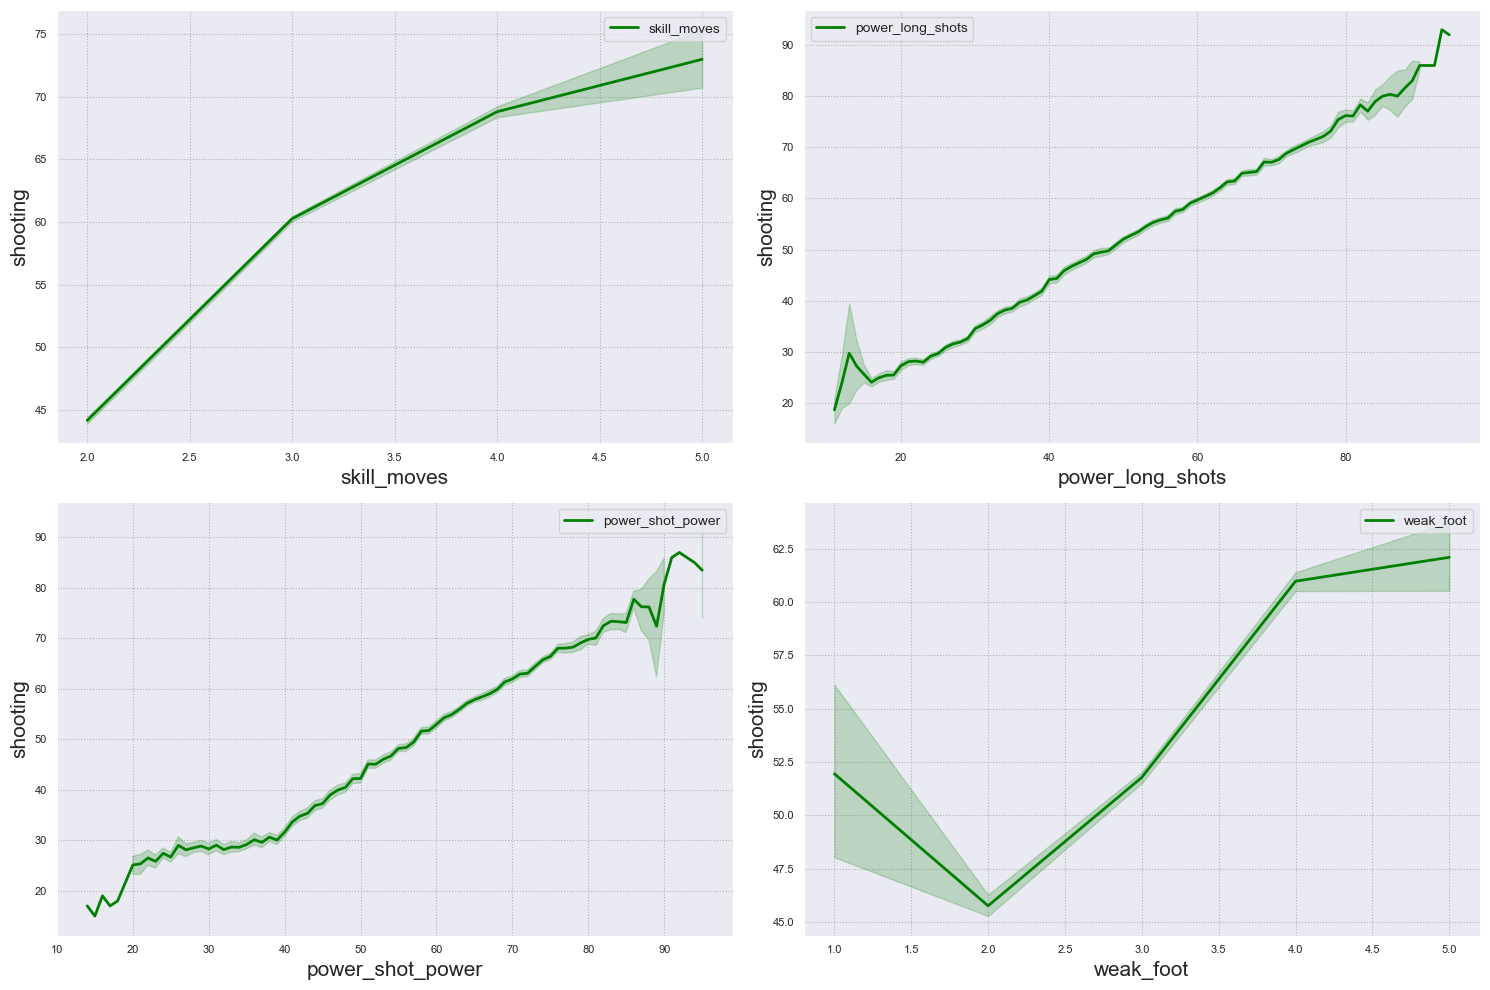

In [17]:
columns_to_plot2 = ["skill_moves", "power_long_shots", "power_shot_power","weak_foot"]
plt.figure(figsize=(15,10))
plotnumber=1

for column in columns_to_plot2:
    if plotnumber<7:
        plt.subplot(2,2,plotnumber)
        sns.lineplot(x=data[column], y=data["shooting"], label=column, color="green",linewidth = 2)
        plt.xlabel(column, fontsize=15)
        plt.ylabel("shooting", fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.legend()
plt.show()

### OBSERVATION/INSIGHTS

#### 1.Relationship between skill_moves and shooting:
- when a player has a higher skill_moves rating, it generally corresponds to an increase in their shooting score.
- There is a positive correlation between a player's skill moves and their shooting ability.
- skill_moves rating range from 3.0 to 5.0 as these skill_moves rating value are increasing, their shooting score are also increasing.

#### 2.Relationship between power_long_shot and shooting:
- when a player possesses higher power_long_shot skills, it typically corresponds to an improvement in their shooting ability.
- positive correlation between a player's power_long_shot ability and their shooting score.
- power_long_shot ability range from 60 to 85 as these power_long_shot ability value are increasing, their shooting score are also increasing.

#### 3.Relationship between power_shot_power and shooting:
- when a player possesses higher power_shot_power skills, it typically corresponds to an improvement in their shooting ability.
- positive correlation between a player's power_shot_power ability and their shooting score.
- power_shot_power ability range from 70 to 100 as these power_shot_power this ability value are increasing, their shooting score are also increasing.

#### 4.Relationship between weak-foot and shooting:
- when a player possesses high weak_foot level, it typically translates into an improvement in their overall shooting ability.
- players with their weak_foot level 4, 4.5 and 5 having high shooting score of players. On the other hand, players with different weak_foot level related shooting score are lower.

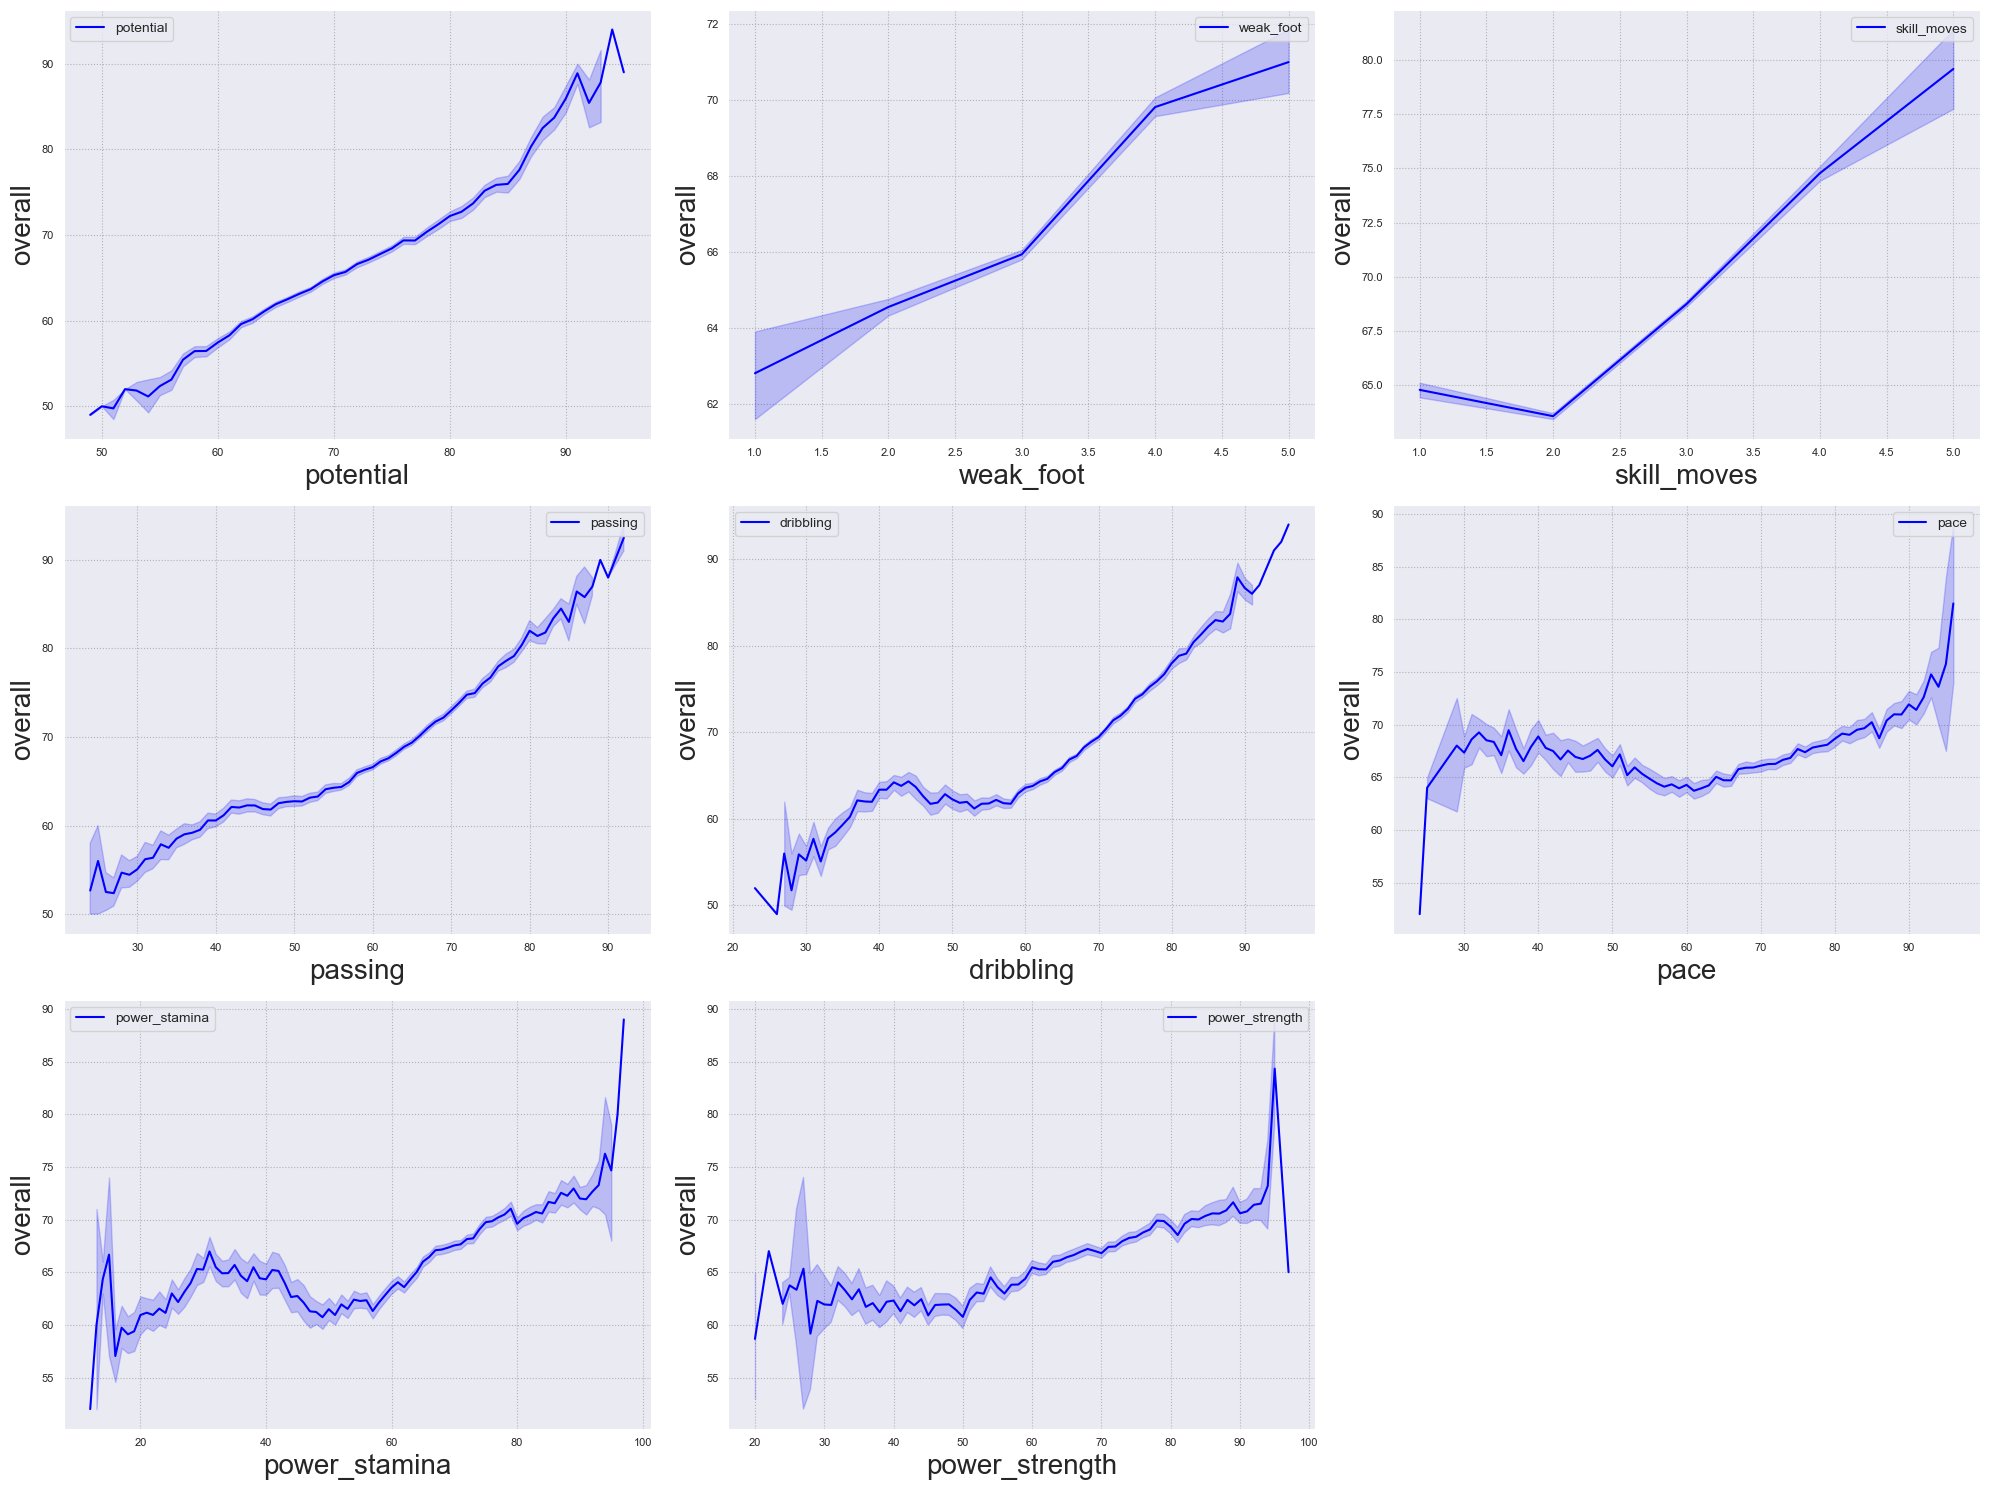

In [18]:
columns_to_plot3 = ["potential","weak_foot","skill_moves","passing","dribbling",
                   "pace","power_stamina","power_strength"]
plt.figure(figsize=(20,15))
plotnumber=1

for column in columns_to_plot3:
    if plotnumber<12:
        plt.subplot(3,3,plotnumber)
        sns.lineplot(x=data[column], y=data["overall"], label=column,color="blue")
        plt.xlabel(column, fontsize=20)
        plt.ylabel("overall", fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.legend()
plt.show()

### OBASERVATION/INSIGHTS

#### 1.Relationship between potential and overall:
- A player has a higher potential it corresponds to a higher overall skill rating.
- There is a positive correlation between a player's potential and overall skill rating.
- potential value are increasing their overall skill rating are also increasing.

#### 2.Relationship between weak_foot and overall:
- A player has a higher weak_foot level it generally corresponds to an increase in their overall skill rating.
- There is a positive correlation between a player's weak_foot and overall skill rating.
- players with weak foot levels of 4, 4.5, and 5 tend to have higher overall skill ratings. Conversely on the other hand players with lower weak foot levels tend to have lower overall skill ratings.

#### 3.Relationship between skill_moves and overall:
- A player has a higher skill_moves it generally corresponds to an increase in their overall skill rating.
- There is a positive correlation between a player's skill_moves and overall skill rating.
- players with skill_moves range from 3 to 5 tend to have higher overall skill ratings. Conversely on the other hand players with lower skill moves tend to have lower overall skill ratings.

#### 4.Relationship between passing and overall:
- Exploring the connection between a player's passing skills and their overall skill rating reveals an interesting trend. Players with higher passing skills generally tend to have higher overall skill ratings.
- This relationship showcases a positive impact of passing skills on a player's overall skill rating.
- players having high passing skill automatically increase their overall skill rating.

#### 5.Relationship between dribbling and overall:
- A player has a higher dribbling skill
it generally corresponds to an increase in their overall skill rating.
- The relationship between dribbling and overall skill impact on players its show postive trends.
- players having high dribbling skill automatically increase their overall skill rating.

#### 6.Relationship between pace and overall:
- In this graph where there is high pace(speed) the overall skill rating is high and where the speed is minimum the overall skill rating is also minimum. but the speed in between these two is less and moore due to this graph is increasing but there is a curve in the middle portion shows ups and down trends of the graph.

#### 7.Relationship between power_stamina & overall:¶
- we analysing the graph the relationship between power_stamina and oevrall skill rating.Some players with higher power_stamina may be of both higher and lower overall skill rating.
- In this graph some start points players with higher power_stamina indicate higher and lower overall skill rating but On the other hand, a higher power_stamina could be overall skill rating is higher as the graph generally shows an increasing trend with overall skill rating.

#### 8.Relationship between power_strength & overall:
- we Analyzing the graph representing the relationship between power_strength and overall skill rating
- In this graph some points players with higher power_strength indicate higher overall skill rating and lower power_strength with overall skill rating  is lower.

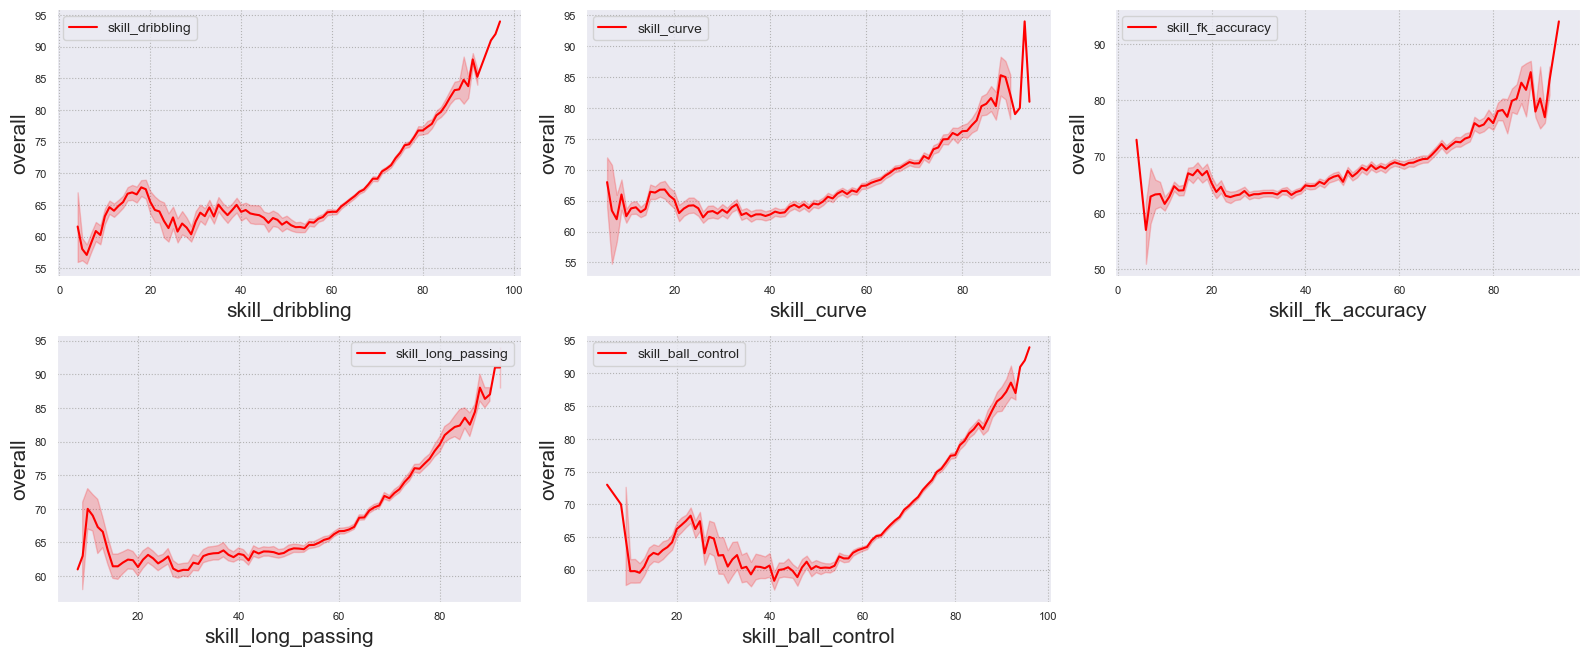

In [19]:
columns_to_plot4 = ["skill_dribbling","skill_curve","skill_fk_accuracy","skill_long_passing","skill_ball_control"]
plt.figure(figsize=(16,16))
plotnumber=1

for column in columns_to_plot4:
    if plotnumber<20:
        plt.subplot(5,3,plotnumber)
        sns.lineplot(x=data[column], y=data["overall"], label=column,color="red")
        plt.xlabel(column, fontsize=15)
        plt.ylabel("overall", fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.legend()
plt.show()

### OBSERVATION/INSIGHTS

#### 1.Relationship between skill_dribbling and overall:
- In this graph we notice that players have higher skill_dribbling tend  have a higher overall skill rating.
- It shows a positive relationship between a player's dribbling skills and their overall skill rating.
- players with skill_dribbling values in the range of 80 to 100 tend to have both high dribbling skills and high overall skill ratings.

#### 2.Relationship between skill_curve and overall:
- In this graph looking the skill_curve its show increasing value with respect to its overall skill rating.
- It show postive relationship between skill curve and overall skill rating.
- skill curve increasing range from 60 to 100 similarly its overall skill also increasing.

#### 3.Relationship between skill_fk_accuracy and overall:
- In this graph we observe that players with higher skill_fk_accuracy tend to have higher overall skill ratings as well.
- It shows a positive relationship between a player's free-kick accuracy skill and their overall skill rating.
- Players with skill_fk_accuracy values increasing from 60 to 100 tend to also have an increasing overall skill rating.

#### 4.Relationship between skill_long_passing and overall:
- we noticed the graph it shows that players with high skill of long passing corresponding incresing its overall skill rating.
- This graph show postive relationship between skill_long_passing and overall skill rating.
- players with skill_long_passing values are increasing from 60 to 100 and its overall skill rating is also high.

#### 5.Relationship between skill_ball_control and overall:
- The graph shows that players with high skill of control the ball at the same time incresing its overall skill rating.
- This graph show postive relationship between skill_long_passing and overall skill rating.
- players with skill_ball_control values are increasing from 80 to 100 and its overall skill rating is also high.

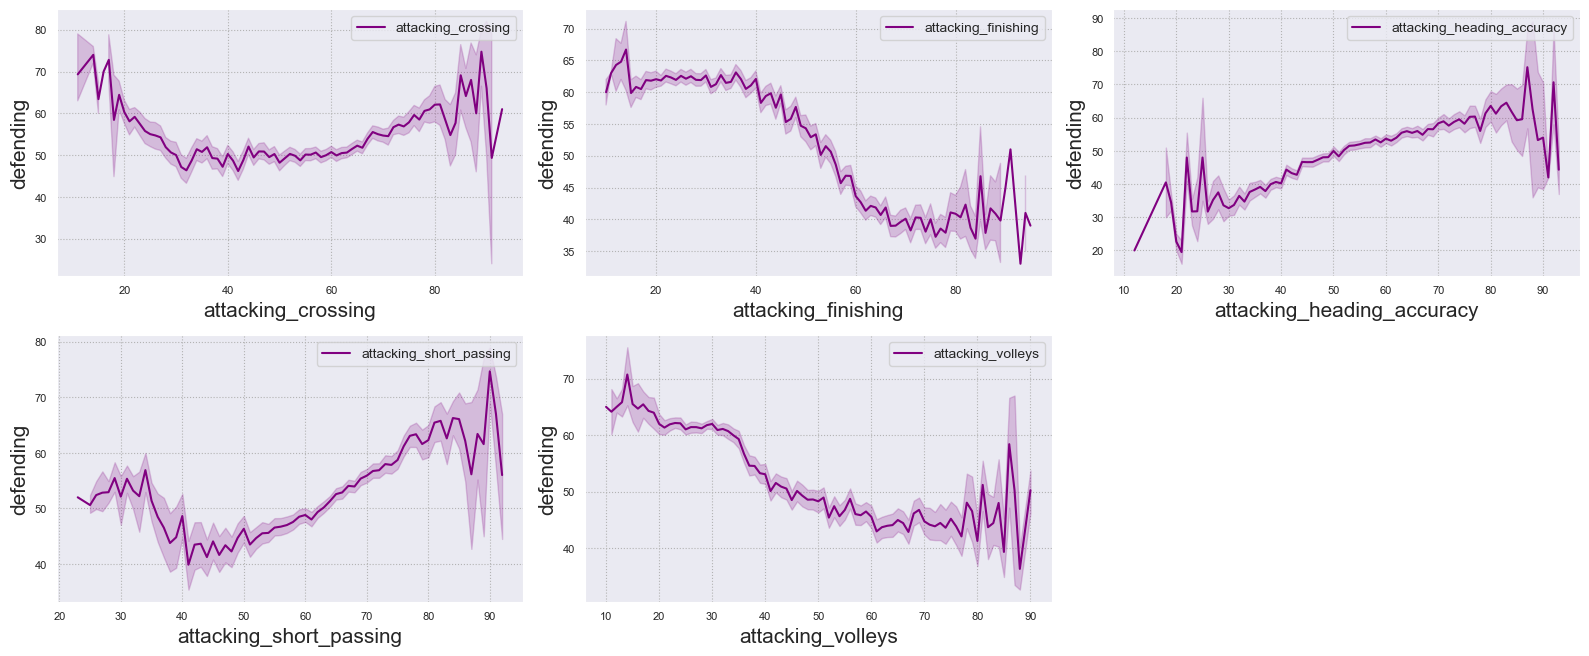

In [20]:
columns_to_plot5 = ["attacking_crossing","attacking_finishing","attacking_heading_accuracy","attacking_short_passing","attacking_volleys"]
plt.figure(figsize=(16,16))
plotnumber=1

for column in columns_to_plot5:
    if plotnumber<20:
        plt.subplot(5,3,plotnumber)
        sns.lineplot(x=data[column], y=data["defending"], label=column,color="purple")
        plt.xlabel(column, fontsize=15)
        plt.ylabel("defending", fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.legend()
plt.show()

### OBSERVATION/INSIGHTS

#### 1.Relationship between attacking_crossing & defending:¶
- we analysing the graph the relationship between attacking_crossong and defending skill.Some players with higher attacking_crossing may be of both higher and lower defending skill.
- In this graph some start points players with higher defending skill indicate lower attacking_crossong but On the other hand, a higher attacking_crossing could be defending skill is higher.
- The analysis players at these specific attacking_crossing around 20, 80, and 85 tend to have higher defending skill.

#### 2.Relationship between attacking_finishing & defending:
- we Analyzing the graph representing the relationship between attacking_finishing and defending skill.
- In this graph when lower attacking_finishing indicate higher defending skill and higher attacking_finishing with defending skill is lower.the graph is inverse.

#### 3.Relationship between attacking_heading_accuracy & defending:
- In this graph higher attacking_heading_accuracy there tends corresponding increase in the defending skill of players.
- Its show postive relationship between attacking_heading_accuracy and defending.
- attacking_heading_accuracy range from 60 to 85 as these attacking_heading_accuracy ability are high, their defending skill are also high.

#### 4.Relationship between attacking_short_passing & defending:
- In this graph higher attacking_short_passing there tends corresponding increase in the defending skill of players.
- Its show postive relationship between attacking_short_passing and defending.
- attacking_heading_accuracy arounds from 35,70,80 and 90  as these attacking_short_passing ability are high, their defending skill are also high.

#### 5.Relationship between attacking_volleys & defending:
- we Analyzing the graph representing the relationship between attacking_volleys and defending skill.
- In this graph when lower attacking_volleys indicate higher defending skill and higher attacking_volleys with defending skill is lower.the graph is inverse.

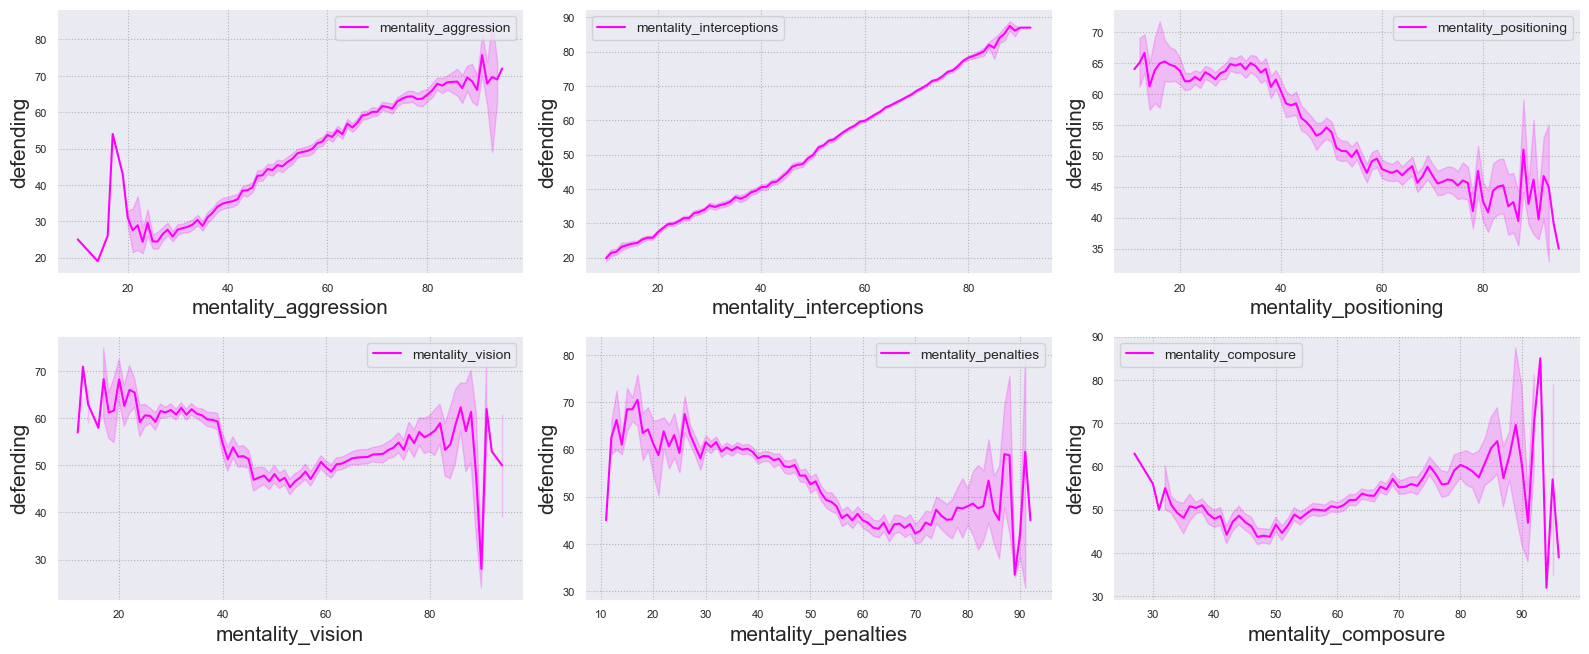

In [21]:
columns_to_plot6 = ["mentality_aggression","mentality_interceptions","mentality_positioning","mentality_vision","mentality_penalties","mentality_composure"]
plt.figure(figsize=(16,16))
plotnumber=1

for column in columns_to_plot6:
    if plotnumber<20:
        plt.subplot(5,3,plotnumber)
        sns.lineplot(x=data[column], y=data["defending"], label=column,color='magenta')
        plt.xlabel(column, fontsize=15)
        plt.ylabel("defending", fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.legend()
plt.show()

### OBSERVATION/INSIGHTS

#### 1.Relationship between mentality_aggression & defending:
- we look this graph we notice that as a player's mentality_aggression level is increases their defending skill also tends to increase.
- This indicates a positive or direct relationship between a player's aggression and their ability to defending skill .
- players with aggression levels in the range of 60 to 90 tend to have higher defending skills.on the other words, players with more aggressive on the field they have high defending skills.

#### 2.Relationship between mentality_interception & defending:
- we examine this graph  a player's ability to make mentality_interception increases their defending skill also tends to increase.
- This also shows a positive or direct relationship between a player's interception skills and their overall defending skills.
- Players with making mentality interceptions values in the range of 60 to 90, tend to have stronger defending skills.

#### 3.Relationship between mentality_positioning & defending:
- When looking at the graph we observe that Players have a lower mentality_positioning tend to be higher defending skill.
- On the other hand, players have a higher mentality_positioning its result in lower defending skills.
- This graph show inverse and negative relationship.

#### 4.Relationship between mentality_aggression & defending:
- we look this graph we notice that as a player's mentality_aggression level is increases their defending skill also tends to increase.
- This indicates a positive or direct relationship between a player's aggression and their ability to defending skill .
- players with aggression levels in the range of 60 to 90 tend to have higher defending skills.on the other words, players with more aggressive on the field they have high defending skills.

#### 5.Relationship between mentality_interception & defending:
- we examine this graph  a player's ability to make mentality_interception increases their defending skill also tends to increase.
- This also shows a positive or direct relationship between a player's interception skills and their overall defending skills.
- Players with making mentality interceptions values in the range of 60 to 90, tend to have stronger defending skills.

#### 6.Relationship between mentality_vision & defending:
- When looking at the graph we observe that Players have a lower and higher mentality_vision tend to be higher defending skill .
- On the other hand, in the middele portion of graph players have a quite lower mentality_vision its result in lower defending skills.
- This graph not be a strong correlation or trend between mentality vision and defending.

#### 7.Relationship between mentality_penalties & defending:
- In this graph we observe that Players have a lower mentality_penaltiestend to be higher defending skill.
- On the other hand, players have a higher mentality_penalties its result in lower defending skills.
- This graph show inverse and negative relationship.

#### 8.Relationship between mentality_composure & defending:
- In this graph it seens that lower mentality_composure have lower defending skill and higher mentality_composure have high defending skill.
- mentality composure value around 85,89 and 90 have high mentality composure their defending skill also high.

#### CATEGORICAL VERIABLE

1.IMPACT OF WORK RATE TO WAGE EUR

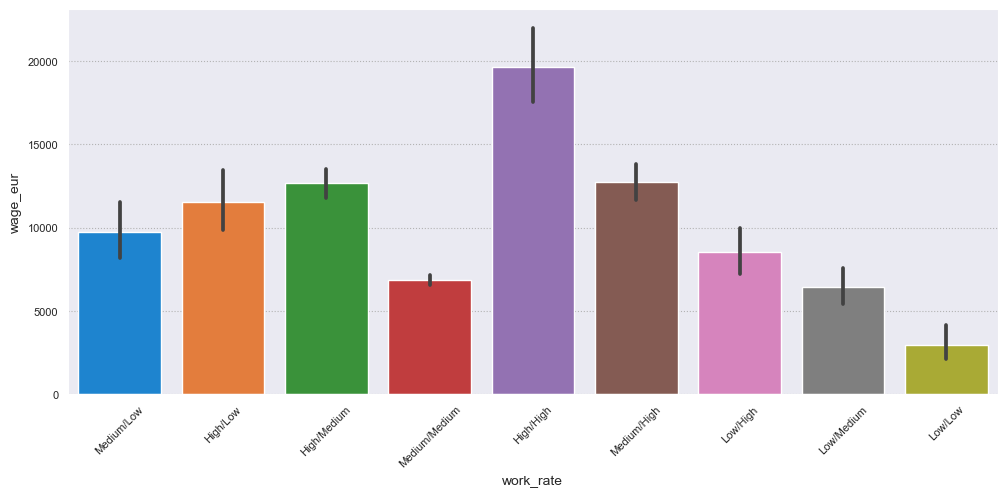

In [22]:
plt.figure(figsize=(12,5))
sns.barplot(x=data["work_rate"],y=data["wage_eur"])
plt.xticks(rotation=45)
plt.show()

### OBSERVATION/INSIGHTS

#### Relationship between work_rate and wage_eur
- In this graph work_rate is "high-high" its wages are also high. players work_rate is 'high-medium' or 'medium-high' is quite high to other there wages are also quite higher then other.

#### 2.IMPACT OF WORK RATE TO VALUE EUR

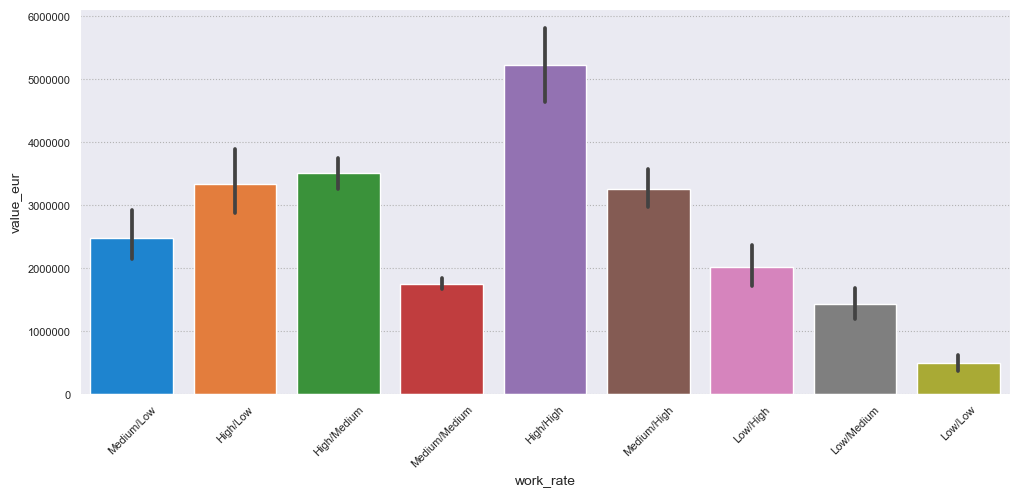

In [23]:
plt.figure(figsize=(12,5))
sns.barplot(x=data["work_rate"],y=data["value_eur"])
plt.xticks(rotation=45)
plt.show()

### OBSERVATION/INSIGHTS

#### Relationship between work_rate and value_eur
- In this graph work_rate is "high-high" its value are also high. players work_rate is 'high-medium'   "medium/high" and "high/low" are also quite higher then other.

#### 3.IMPACT OF WEAK FOOT TO SHOOTING

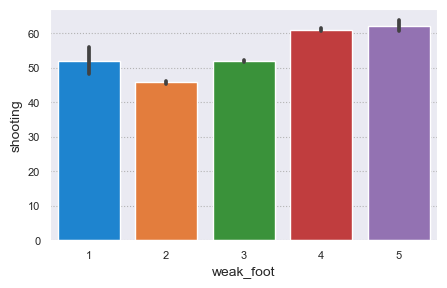

In [24]:
plt.figure(figsize=(5,3))
sns.barplot(x=data["weak_foot"],y=data["shooting"])
plt.show()

### OBSERVATION/INSIGHTS

#### Relationship between weak_foot & shooting:
- In this graph highest weak_foot level is five and four their shooting score is also high 60 and  above to 60.
- one and three weak_foot level is quite high and its shooting score is also high as compare to weak_foot level two its above 50.

#### 4.IMPACT OF TEAM POSITION TO SHOOTING

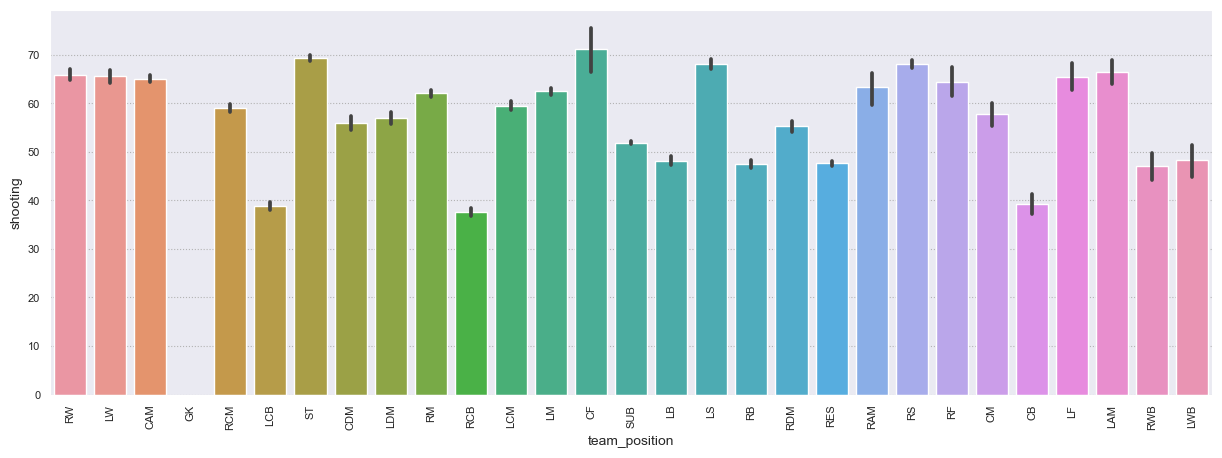

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(x=data["team_position"],y=data["shooting"])
plt.xticks(rotation=90)
plt.show()

### OBSERVATION/INSIGHTS

#### Relationship between Team_position & shooting
- In this graph is clearly seen that 'CF' position is high and their shooting score is also high above the 70.
- 'ST','LS','RS' this position having shooting score is high near to 70.
- 'RW','LW','CAM','RAM,'RF','LF,'LAM' this position have shooting score is high its above 60.

### 3. MULTIVARIATE DATA ANALYSIS

#### 1.RELATION BETWEEN HEIGHT AND WEIGHT WITH RESPECT TO BODY TYPE

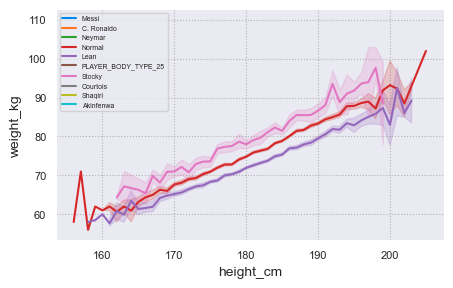

In [26]:
plt.figure(figsize=(5,3))
sns.lineplot(x=data["height_cm"], y=data["weight_kg"], hue=data["body_type"])
plt.legend(prop={'size': 5})
plt.show()

### OBSERVATION/INSIGHT

- In this graph as height is increasing weight is also increasing with respect to three types of body normal, lean, Courtois.

2.RELATION BETWEEN SKILL MOVES AND OVERALL WITH RESPECT TO PREFERRED FOOT

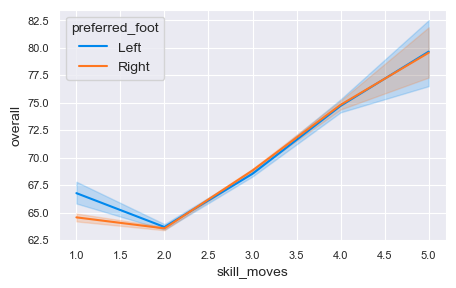

In [27]:
plt.figure(figsize=(5,3))
sns.set_style('darkgrid')
sns.lineplot(x=data["skill_moves"], y=data["overall"], hue=data["preferred_foot"])
plt.show()

### OBSERVATION/INSIGHT

- the overall skill rating for the score of two is very low with respect to both foot.
- on the other hand skill_moves increasing range from 4 to 5 along with their overall skill rating is also increasing with both right and left foot.

#### 3.RELATION BETWEEN DRIBBLING AND OVERALL WITH RESPECT TO PREFERRED FOOT

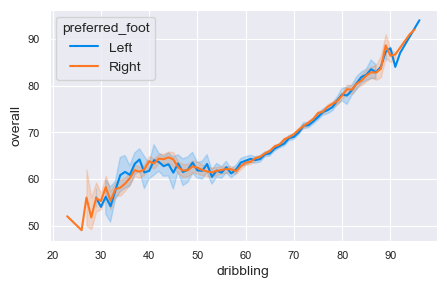

In [28]:
plt.figure(figsize=(5,3))
sns.set_style('darkgrid')
sns.lineplot(x=data["dribbling"], y=data["overall"], hue=data["preferred_foot"])
plt.show()

#### Observation/Insights
- In this graph we see the relationship between dribbling and overall with respect to preferred_foot and we clearly seen that dribbling skill is increasing at the same time overall skill rating also increasing with respect to preferred right or left foot.

#### 4.RELATION BETWEEN PASSING AND OVERALL WITH RESPECT TO PREFERRED FOOT

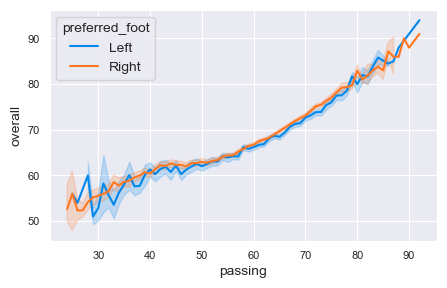

In [29]:
plt.figure(figsize=(5,3))
sns.set_style('darkgrid')
sns.lineplot(x=data["passing"], y=data["overall"], hue=data["preferred_foot"])
plt.show()

### OBSERVATION/INSIGHTS
- In this graph we see the relationship between passing and overall with respect to preferred_foot here clearly seen that passing score increased at the same time overall skill rating are also increase with both preferred foot

#### 5.RELATION BETWEEN GK_KICKING AND OVERALL WITH RESPECT TO PREFERRED FOOT

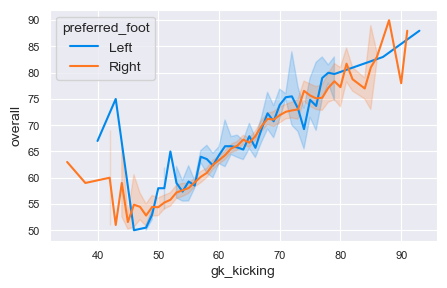

In [30]:
plt.figure(figsize=(5,3))
sns.set_style('darkgrid')
sns.lineplot(x=data["gk_kicking"], y=data["overall"], hue=data["preferred_foot"])
plt.show()

### OBSERVATION/INSIGHT
- preferred right and left foot at the start are both slightly high as compared to where the gk_kicking is increasing along with their overall skill rating is also increasing with both right and left foot.

#### 6.RELATION BETWEEN GK_SPEED AND OVERALL WITH RESPECT TO PREFERRED FOOT

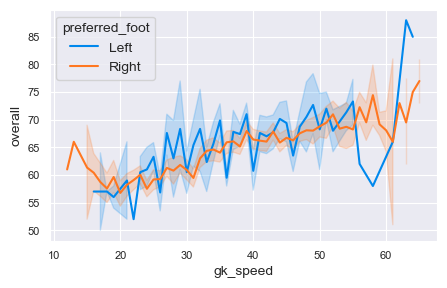

In [31]:
plt.figure(figsize=(5,3))
sns.set_style('darkgrid')
sns.lineplot(x=data["gk_speed"], y=data["overall"], hue=data["preferred_foot"])
plt.show()

### OBSERVATION/INSIGHT
- In this graph preferred left foot with respect to their gk speed and overall skill rating is suddenly increase and suddenly decrease. but on the other hand preferred right foot with respect to gk speed and overall skill rating both are increasing

#### 7.RELATION BETWEEN POWER STAMINA AND POTENTIAL WITH RESPECT TO PREFERRED FOOT

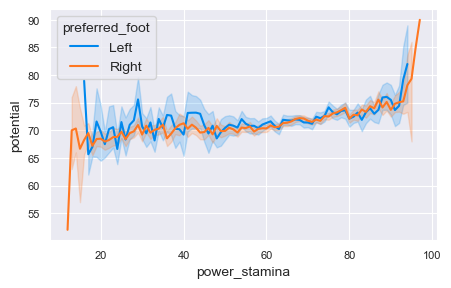

In [32]:
plt.figure(figsize=(5,3))
sns.set_style('darkgrid')
sns.lineplot(x=data["power_stamina"], y=data["potential"], hue=data["preferred_foot"])
plt.show()

### OBSERVATION/INSIGHT
- At the start stages players with a preference for their right foot tend to have a low potential score.  their power_stamina is minimum a score of before 20, there is a suddenly drop in their potential rating. currently players with a preference for their left foot see a sudden increase in their potential rating it rises to 80.
- on the other hand power_stamina increasing along with their score of potential is also increasing with both right and left foot.

#### 8.RELATION BETWEEN PHYSIC AND POTENTIAL WITH RESPECT TO PREFERRED FOOT

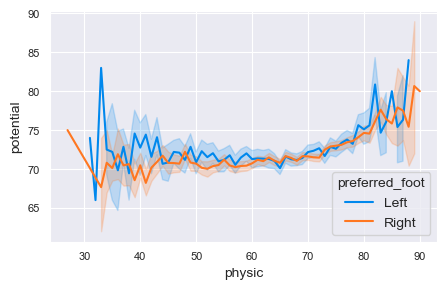

In [33]:
plt.figure(figsize=(5,3))
sns.set_style('darkgrid')
sns.lineplot(x=data["physic"], y=data["potential"], hue=data["preferred_foot"])
plt.show()

### OBSERVATION/INSIGHT
- preferred left foot has gone slightly above 80 score of potential at the start and the preferred right foot has gone up to 75 score of potential at the start.
- physic is increasing along with their score of potential is also increasing with both right and left foot.

## HERE SOME CONDITION & PLOTTING

### 1.PREPARE A RANK ORDERED LIST OF TOP 10 COUNTRIES WITH MOST PLAYERS. WHICH COUNTRIES ARE PRODUCING THE MOST FOOTBALLERS THAT PLAY AT THIS LEVEL?

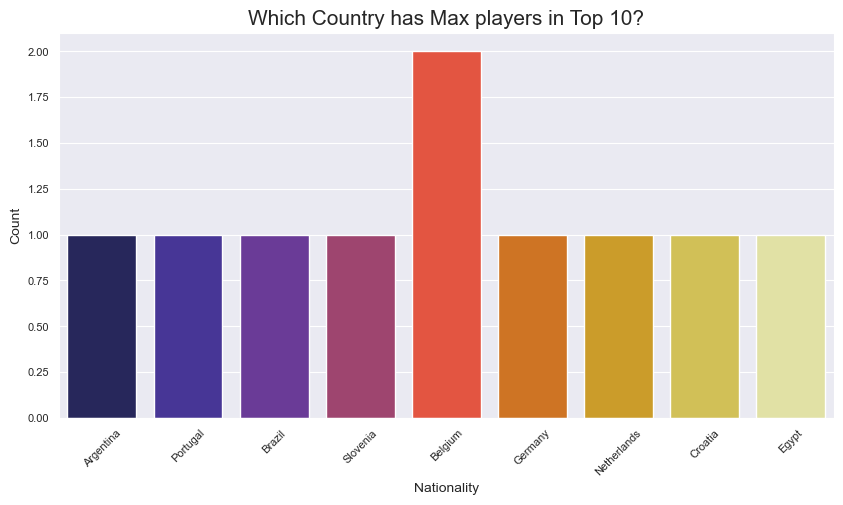

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='nationality',data=data.head(10),palette='CMRmap')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Country has Max players in Top 10?',fontsize = 15)
plt.show()

### OBSERVATION/INSIGHTS:
Belgium country has the highest representation player among the top 10.

### 2.PLOT THE DISTRIBUTION OF OVERALL RATING VS. AGE OF PLAYERS. INTERPRET WHAT IS THE AGE AFTER WHICH A PLAYER STOPS IMPROVING?

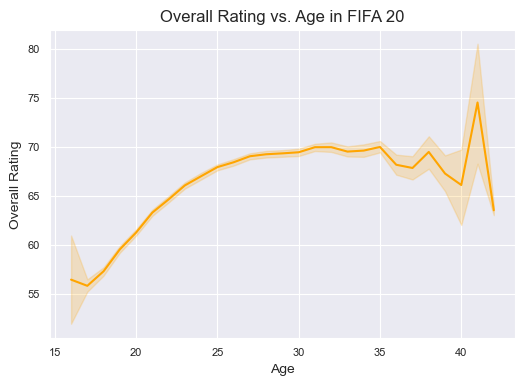

In [35]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=data, x='age', y='overall', color='orange')
plt.title('Overall Rating vs. Age in FIFA 20')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.grid(True)

### OBSERVATION/INSIGHT

-  It can be estimated that a player typically stops improving after the age of 40.

### 3.WHICH TYPE OF OFFENSIVE PLAYER TENDS TO GET PAID THE MOST: THE STRIKER, THE RIGHT WINGER, THE LEFT WINGER

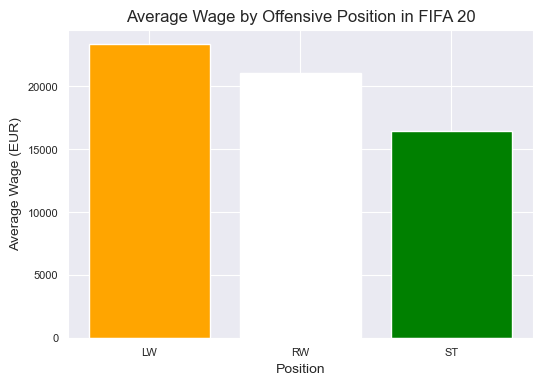

In [36]:
offensive_positions = ['ST', 'RW', 'LW']
filtered_data = data[data['team_position'].isin(offensive_positions)]

# Group the data by position and calculate the average wage
average_wage_by_position = filtered_data.groupby('team_position')['wage_eur'].mean().reset_index()

# Create a bar chart to visualize the average wages by position
plt.figure(figsize=(6,4),facecolor="white")
plt.bar(average_wage_by_position['team_position'], average_wage_by_position['wage_eur'], color=['orange', 'white', 'green'])
plt.title('Average Wage by Offensive Position in FIFA 20')
plt.xlabel('Position')
plt.ylabel('Average Wage (EUR)')
plt.show()